# Importing libraries

In [217]:
from openslide import open_slide
import openslide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from openslide.deepzoom import DeepZoomGenerator
import os
from collections import defaultdict
from matplotlib.pyplot import imread

# WSI Images Class

In [265]:
class WSI_images:
    def __init__(self,size,img,write_Dir,micron):
        self.img = img
        self.size = size
        self.dir = write_Dir
        self.tiles = DeepZoomGenerator(slide,tile_size=self.size,overlap=0,limit_bounds=False)
        self.factor = self.tiles.level_count-1 #zoom factor
        self.Index = defaultdict()
        self.neighbours = defaultdict()

    def make_patches(self):
        cols,rows = self.tiles.level_tiles[self.factor]
        
        self.cols = cols
        self.rows = rows
        #linear index 
        alpha = 0
        
        tile_dir = self.dir #directory where it will be saved
        for row in range(rows):
            for col in range(cols):
                tile_name = os.path.join(tile_dir,'%d_%d' % (col,row))
                print("saving images by name: ", tile_name)
                temp_tile = self.tiles.get_tile(self.factor,(col,row))
                temp_tile_np = np.array(temp_tile)
                plt.imsave(tile_name + ".png" , temp_tile_np)
                
                
                #row wise indexing
                #print(self.factor)
                self.Index[alpha] = [(row,col), tiles.get_tile_dimensions(self.factor,(row,col))]

                alpha=alpha+1
                
                #generate 8 neightbours:
                key = (row,col)
                self.neighbours[key] = []
                
                if key[1]!=0:
                    self.neighbours[key].append((row,col-1))                    
            
                    if key[0] != 0:
                        self.neighbours[key].append((row-1,col-1))                    

            
                
                if key[1] != cols-1:
                    self.neighbours[key].append((row,col+1))
                                               
                    if key[0] != row-1:
                        self.neighbours[key].append((row+1,col+1))                                                
                                               
                    
                if key[0]!=0:
                    self.neighbours[key].append((row-1,col))
     
                                               
                    if key[1] != 0:
                        self.neighbours[key].append((row-1,col-1)) 
                                               
                
                if key[0] != row-1:
                    self.neighbours[key].append((row+1,col))
                                               
                    if key[1] != row-1:
                        self.neighbours[key].append((row+1,col+1)) 

                
                
        print("All images saved of size: ", self.size)
    
    def return_index(self):
        return self.Index
    
    
    def return_linear_index(self):
        return self.Index.keys()

    def xy_to_linear(self,x,y):
        return (self.cols*y)+x
    
    def linear_to_xy(self,linear):
        
        x = linear % self.cols
        y = (linear-x) % self.cols
        
        return (y,x)
    
    def generate_8_neighbours(self,x,y):
        cord = (x,y)
        return self.neighbours[cord]
    
    def return_8_neighbours(self):
        return self.neighbours
        
    def display_8_neighbours(self,x,y):
        
        cord = (x,y)
        
        tile_dir = self.dir #directory where it was saved

        n = self.neighbours[cord]

        # Create a 4x4 grid of subplots
        fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

        count=0
        # Loop through each subplot and plot an image
        for i in range(3):
            for j in range(3):

                if count == len(n)-1:
                    break

                temp = n[count]
                tile_name = os.path.join(tile_dir,'%d_%d' % temp)
                tile_name += '.png'
                print(tile_name)
                im=imread(tile_name)
                axs[i, j].imshow(im)
                axs[i, j].axis("off")

                count+=1
        # Add a title to the plot
        fig.suptitle("16 Images")

        # Display the plot
        plt.show()
        
    def return_8_neighbours_provdide_cord(self,x,y):
        cord = (x,y)
        return self.neighbours[cord]

# Processing for Image 1

# 1. reading image

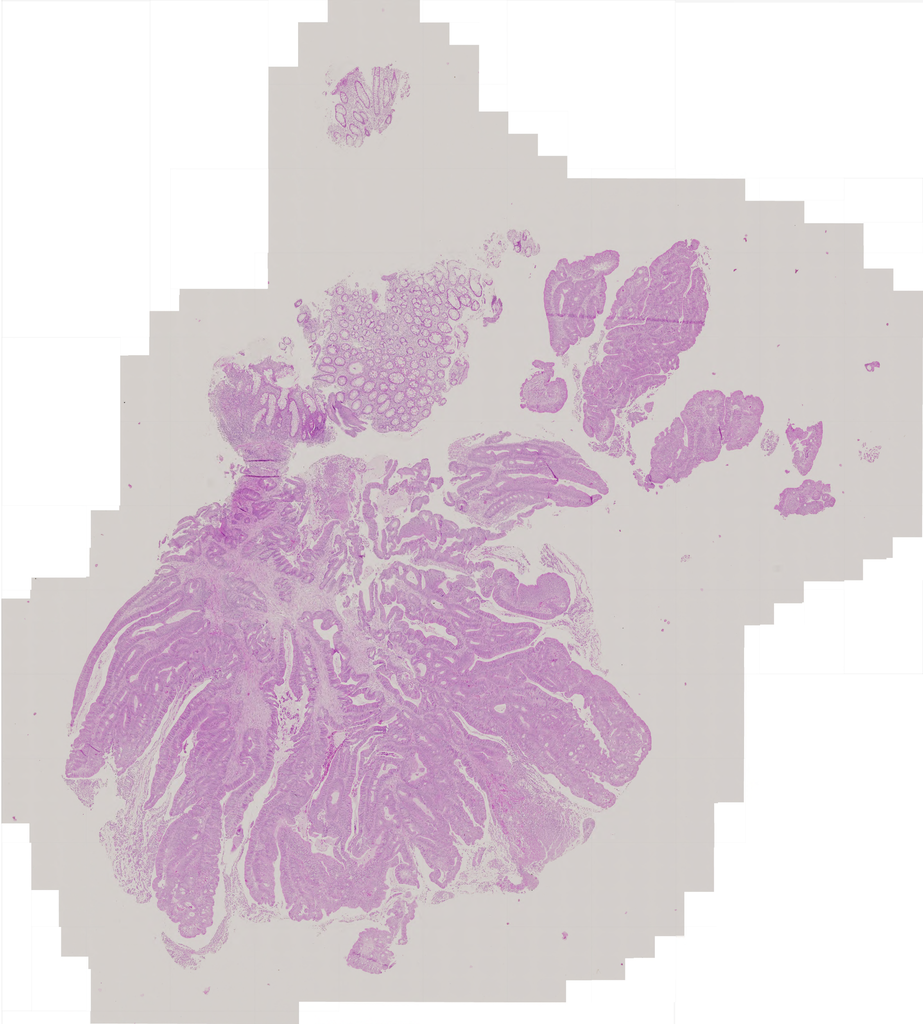

In [219]:
slide = open_slide('./Images/TCGA-AA-3492-01Z-00-DX1.32D79909-71D5-4843-847E-AECA5DBC963D.svs')

slic = slide.get_thumbnail(size=(1024,1024))
slic

## 2. Extracting small image patches of spatial resolution 1024×1024 at 0.5 micron per pixels (MPP)

In [220]:
path = './img2_patches'
proc1 = WSI_images(1024,slide,path,0.5) #sending size eqaual to 1024 * 1024

In [221]:
proc1.make_patches()

saving images by name:  ./img2_patches/0_0
saving images by name:  ./img2_patches/1_0
saving images by name:  ./img2_patches/2_0
saving images by name:  ./img2_patches/3_0
saving images by name:  ./img2_patches/4_0
saving images by name:  ./img2_patches/5_0
saving images by name:  ./img2_patches/6_0
saving images by name:  ./img2_patches/7_0
saving images by name:  ./img2_patches/8_0
saving images by name:  ./img2_patches/0_1
saving images by name:  ./img2_patches/1_1
saving images by name:  ./img2_patches/2_1
saving images by name:  ./img2_patches/3_1
saving images by name:  ./img2_patches/4_1
saving images by name:  ./img2_patches/5_1
saving images by name:  ./img2_patches/6_1
saving images by name:  ./img2_patches/7_1
saving images by name:  ./img2_patches/8_1
saving images by name:  ./img2_patches/0_2
saving images by name:  ./img2_patches/1_2
saving images by name:  ./img2_patches/2_2
saving images by name:  ./img2_patches/3_2
saving images by name:  ./img2_patches/4_2
saving imag

# LINEAR INDEXING

## a. a. Maintaining a suitable data structure of starting locations of each image patch (i.e. x1,y2 coordinates) as well as size (i.e. width (w), and height (h)).

In [222]:
#default dictionary 
proc1.return_index() #linear index: (x,y coords), size

defaultdict(None,
            {0: [(0, 0), (1024, 1024)],
             1: [(0, 1), (1024, 1024)],
             2: [(0, 2), (1024, 1024)],
             3: [(0, 3), (1024, 1024)],
             4: [(0, 4), (1024, 1024)],
             5: [(0, 5), (1024, 1024)],
             6: [(0, 6), (1024, 1024)],
             7: [(0, 7), (1024, 1024)],
             8: [(0, 8), (1024, 1024)],
             9: [(1, 0), (1024, 1024)],
             10: [(1, 1), (1024, 1024)],
             11: [(1, 2), (1024, 1024)],
             12: [(1, 3), (1024, 1024)],
             13: [(1, 4), (1024, 1024)],
             14: [(1, 5), (1024, 1024)],
             15: [(1, 6), (1024, 1024)],
             16: [(1, 7), (1024, 1024)],
             17: [(1, 8), (1024, 1024)],
             18: [(2, 0), (1024, 1024)],
             19: [(2, 1), (1024, 1024)],
             20: [(2, 2), (1024, 1024)],
             21: [(2, 3), (1024, 1024)],
             22: [(2, 4), (1024, 1024)],
             23: [(2, 5), (1024, 1024)],
        

# B. Linear Indexing Functions

In [223]:
print("All the linear indexes")
proc1.return_linear_index()

All the linear indexes


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])

### d. Implementing another method that converts linear index, α, back into (x,y) coordinates.

In [224]:
X = int(input("Input linear index"))
proc1.linear_to_xy(X)

Input linear index2


(0, 2)

### c. Implementing a method to convert (x,y) coordinates of a patch image in WSI into a linear index, α.

In [225]:
y=int(input("Enter value of y:"))
x=int(input("Enter value of x:"))

print("for coordinates: ",(x,y)," linear indexing: ",proc1.xy_to_linear(x,y))

Enter value of y:4
Enter value of x:5
for coordinates:  (5, 4)  linear indexing:  41


# code to display all neightbours

In [226]:
proc1.return_8_neighbours()

defaultdict(None,
            {(0, 0): [(0, 1), (1, 1), (1, 0), (1, 1)],
             (0, 1): [(0, 0), (0, 2), (1, 2), (1, 1), (1, 2)],
             (0, 2): [(0, 1), (0, 3), (1, 3), (1, 2), (1, 3)],
             (0, 3): [(0, 2), (0, 4), (1, 4), (1, 3), (1, 4)],
             (0, 4): [(0, 3), (0, 5), (1, 5), (1, 4), (1, 5)],
             (0, 5): [(0, 4), (0, 6), (1, 6), (1, 5), (1, 6)],
             (0, 6): [(0, 5), (0, 7), (1, 7), (1, 6), (1, 7)],
             (0, 7): [(0, 6), (0, 8), (1, 8), (1, 7), (1, 8)],
             (0, 8): [(0, 7), (1, 8), (1, 9)],
             (1, 0): [(1, 1), (2, 1), (0, 0), (2, 0)],
             (1, 1): [(1, 0),
              (0, 0),
              (1, 2),
              (2, 2),
              (0, 1),
              (0, 0),
              (2, 1),
              (2, 2)],
             (1, 2): [(1, 1),
              (0, 1),
              (1, 3),
              (2, 3),
              (0, 2),
              (0, 1),
              (2, 2),
              (2, 3)],
             (

# e. PLOT of 8 neighbouring patches of image provided axis

./img2_patches/2_5.png
./img2_patches/1_5.png
./img2_patches/2_7.png
./img2_patches/3_7.png
./img2_patches/1_6.png
./img2_patches/1_5.png
./img2_patches/3_6.png


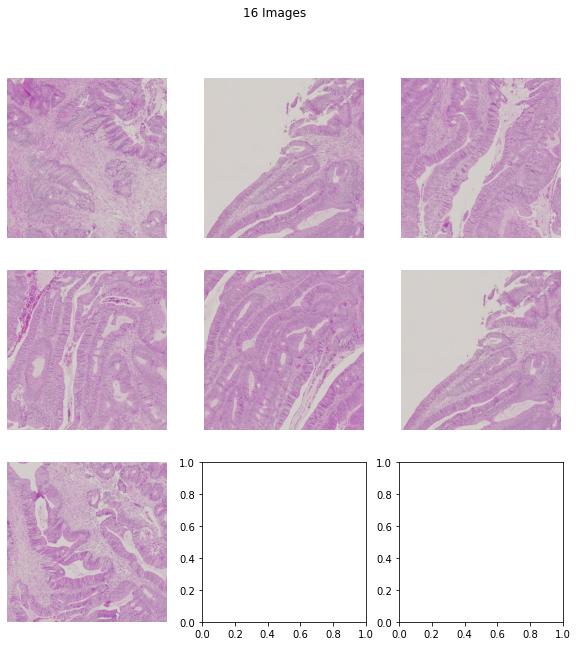

In [227]:
proc1.display_8_neighbours(2,6)

## 3. To implement a method that can generate list of all 8-neibouring patches of a given patch coordinates (x,y) and a size (w, h) of image. 

In [228]:
proc1.return_8_neighbours_provdide_cord(0,2)

[(0, 1), (0, 3), (1, 3), (1, 2), (1, 3)]

# For Rest of the images

# Image 2

In [266]:
p= './Images/TCGA-AA-3814-01Z-00-DX1.15a569dc-30d6-4bef-908b-6183df4e9e01.svs'

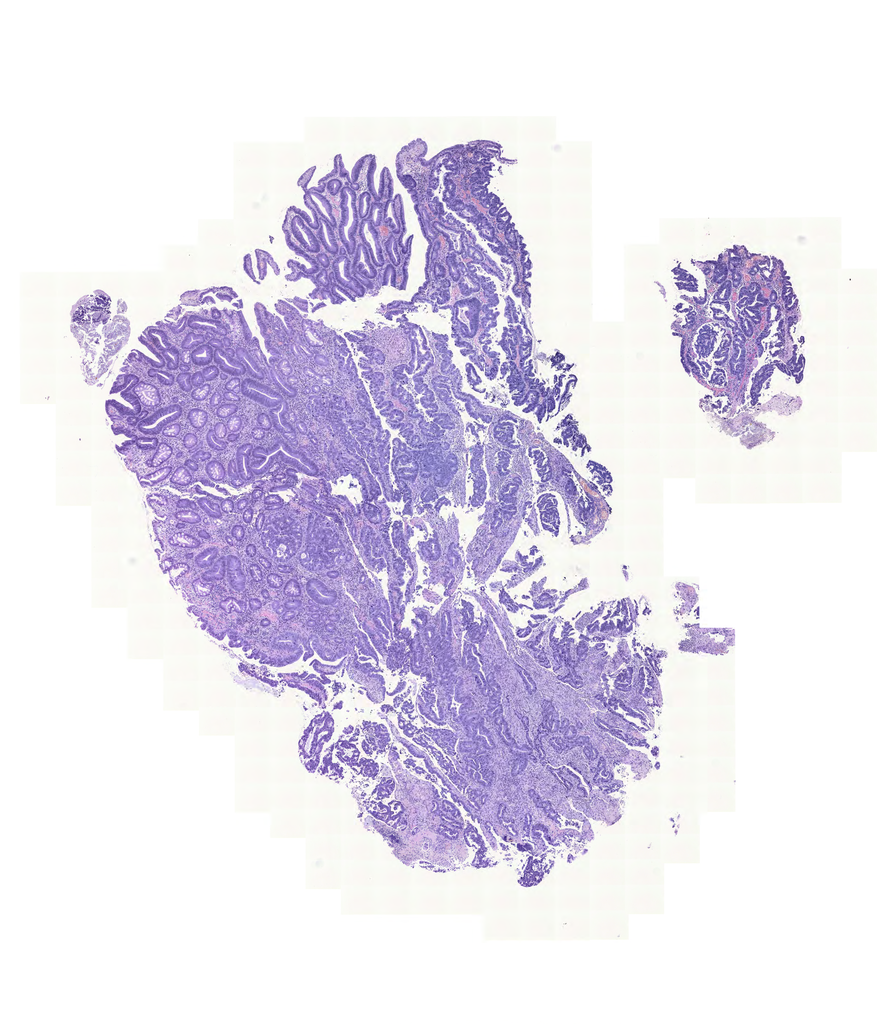

In [267]:
slide = open_slide(p)
slic = slide.get_thumbnail(size=(1024,1024))
slic

In [268]:
path = './img1_patches'
proc2 = WSI_images(1024,slide,path,0.5) #sending size eqaual to 1024 * 1024

In [269]:
proc2.make_patches()

saving images by name:  ./img1_patches/0_0
16
saving images by name:  ./img1_patches/1_0
16
saving images by name:  ./img1_patches/2_0
16
saving images by name:  ./img1_patches/3_0
16
saving images by name:  ./img1_patches/4_0
16
saving images by name:  ./img1_patches/5_0
16
saving images by name:  ./img1_patches/6_0
16
saving images by name:  ./img1_patches/7_0
16
saving images by name:  ./img1_patches/8_0
16
saving images by name:  ./img1_patches/9_0
16
saving images by name:  ./img1_patches/10_0
16
saving images by name:  ./img1_patches/11_0
16
saving images by name:  ./img1_patches/12_0
16
saving images by name:  ./img1_patches/13_0
16
saving images by name:  ./img1_patches/14_0
16
saving images by name:  ./img1_patches/15_0
16
saving images by name:  ./img1_patches/16_0
16
saving images by name:  ./img1_patches/17_0
16
saving images by name:  ./img1_patches/18_0
16
saving images by name:  ./img1_patches/19_0
16
saving images by name:  ./img1_patches/20_0
16
saving images by name: 

16
saving images by name:  ./img1_patches/27_5
16
saving images by name:  ./img1_patches/28_5
16
saving images by name:  ./img1_patches/29_5
16
saving images by name:  ./img1_patches/0_6
16
saving images by name:  ./img1_patches/1_6
16
saving images by name:  ./img1_patches/2_6
16
saving images by name:  ./img1_patches/3_6
16
saving images by name:  ./img1_patches/4_6
16
saving images by name:  ./img1_patches/5_6
16
saving images by name:  ./img1_patches/6_6
16
saving images by name:  ./img1_patches/7_6
16
saving images by name:  ./img1_patches/8_6
16
saving images by name:  ./img1_patches/9_6
16
saving images by name:  ./img1_patches/10_6
16
saving images by name:  ./img1_patches/11_6
16
saving images by name:  ./img1_patches/12_6
16
saving images by name:  ./img1_patches/13_6
16
saving images by name:  ./img1_patches/14_6
16
saving images by name:  ./img1_patches/15_6
16
saving images by name:  ./img1_patches/16_6
16
saving images by name:  ./img1_patches/17_6
16
saving images by nam

16
saving images by name:  ./img1_patches/22_11
16
saving images by name:  ./img1_patches/23_11
16
saving images by name:  ./img1_patches/24_11
16
saving images by name:  ./img1_patches/25_11
16
saving images by name:  ./img1_patches/26_11
16
saving images by name:  ./img1_patches/27_11
16
saving images by name:  ./img1_patches/28_11
16
saving images by name:  ./img1_patches/29_11
16
saving images by name:  ./img1_patches/0_12
16
saving images by name:  ./img1_patches/1_12
16
saving images by name:  ./img1_patches/2_12
16
saving images by name:  ./img1_patches/3_12
16
saving images by name:  ./img1_patches/4_12
16
saving images by name:  ./img1_patches/5_12
16
saving images by name:  ./img1_patches/6_12
16
saving images by name:  ./img1_patches/7_12
16
saving images by name:  ./img1_patches/8_12
16
saving images by name:  ./img1_patches/9_12
16
saving images by name:  ./img1_patches/10_12
16
saving images by name:  ./img1_patches/11_12
16
saving images by name:  ./img1_patches/12_12
16

16
saving images by name:  ./img1_patches/14_17
16
saving images by name:  ./img1_patches/15_17
16
saving images by name:  ./img1_patches/16_17
16
saving images by name:  ./img1_patches/17_17
16
saving images by name:  ./img1_patches/18_17
16
saving images by name:  ./img1_patches/19_17
16
saving images by name:  ./img1_patches/20_17
16
saving images by name:  ./img1_patches/21_17
16
saving images by name:  ./img1_patches/22_17
16
saving images by name:  ./img1_patches/23_17
16
saving images by name:  ./img1_patches/24_17
16
saving images by name:  ./img1_patches/25_17
16
saving images by name:  ./img1_patches/26_17
16
saving images by name:  ./img1_patches/27_17
16
saving images by name:  ./img1_patches/28_17
16
saving images by name:  ./img1_patches/29_17
16
saving images by name:  ./img1_patches/0_18
16
saving images by name:  ./img1_patches/1_18
16
saving images by name:  ./img1_patches/2_18
16
saving images by name:  ./img1_patches/3_18
16
saving images by name:  ./img1_patches/4_

16
saving images by name:  ./img1_patches/6_23
16
saving images by name:  ./img1_patches/7_23
16
saving images by name:  ./img1_patches/8_23
16
saving images by name:  ./img1_patches/9_23
16
saving images by name:  ./img1_patches/10_23
16
saving images by name:  ./img1_patches/11_23
16
saving images by name:  ./img1_patches/12_23
16
saving images by name:  ./img1_patches/13_23
16
saving images by name:  ./img1_patches/14_23
16
saving images by name:  ./img1_patches/15_23
16
saving images by name:  ./img1_patches/16_23
16
saving images by name:  ./img1_patches/17_23
16
saving images by name:  ./img1_patches/18_23
16
saving images by name:  ./img1_patches/19_23
16
saving images by name:  ./img1_patches/20_23
16
saving images by name:  ./img1_patches/21_23
16
saving images by name:  ./img1_patches/22_23
16
saving images by name:  ./img1_patches/23_23
16
saving images by name:  ./img1_patches/24_23
16
saving images by name:  ./img1_patches/25_23
16
saving images by name:  ./img1_patches/26

16
saving images by name:  ./img1_patches/28_28
16
saving images by name:  ./img1_patches/29_28
16
saving images by name:  ./img1_patches/0_29
16
saving images by name:  ./img1_patches/1_29
16
saving images by name:  ./img1_patches/2_29
16
saving images by name:  ./img1_patches/3_29
16
saving images by name:  ./img1_patches/4_29
16
saving images by name:  ./img1_patches/5_29
16
saving images by name:  ./img1_patches/6_29
16
saving images by name:  ./img1_patches/7_29
16
saving images by name:  ./img1_patches/8_29
16
saving images by name:  ./img1_patches/9_29
16
saving images by name:  ./img1_patches/10_29
16
saving images by name:  ./img1_patches/11_29
16
saving images by name:  ./img1_patches/12_29
16
saving images by name:  ./img1_patches/13_29
16
saving images by name:  ./img1_patches/14_29
16
saving images by name:  ./img1_patches/15_29
16
saving images by name:  ./img1_patches/16_29
16
saving images by name:  ./img1_patches/17_29
16
saving images by name:  ./img1_patches/18_29
16

ValueError: Invalid address

In [270]:
#default dictionary 
proc2.return_index()

defaultdict(None,
            {0: [(0, 0), (1024, 1024)],
             1: [(0, 1), (1024, 1024)],
             2: [(0, 2), (1024, 1024)],
             3: [(0, 3), (1024, 1024)],
             4: [(0, 4), (1024, 1024)],
             5: [(0, 5), (1024, 1024)],
             6: [(0, 6), (1024, 1024)],
             7: [(0, 7), (1024, 1024)],
             8: [(0, 8), (1024, 1024)],
             9: [(0, 9), (1024, 1024)],
             10: [(0, 10), (1024, 1024)],
             11: [(0, 11), (1024, 1024)],
             12: [(0, 12), (1024, 1024)],
             13: [(0, 13), (1024, 1024)],
             14: [(0, 14), (1024, 1024)],
             15: [(0, 15), (1024, 1024)],
             16: [(0, 16), (1024, 1024)],
             17: [(0, 17), (1024, 1024)],
             18: [(0, 18), (1024, 1024)],
             19: [(0, 19), (1024, 1024)],
             20: [(0, 20), (1024, 1024)],
             21: [(0, 21), (1024, 1024)],
             22: [(0, 22), (1024, 1024)],
             23: [(0, 23), (1024, 10

./img1_patches/6_10.png
./img1_patches/5_10.png
./img1_patches/6_12.png
./img1_patches/7_12.png
./img1_patches/5_11.png
./img1_patches/5_10.png
./img1_patches/7_11.png


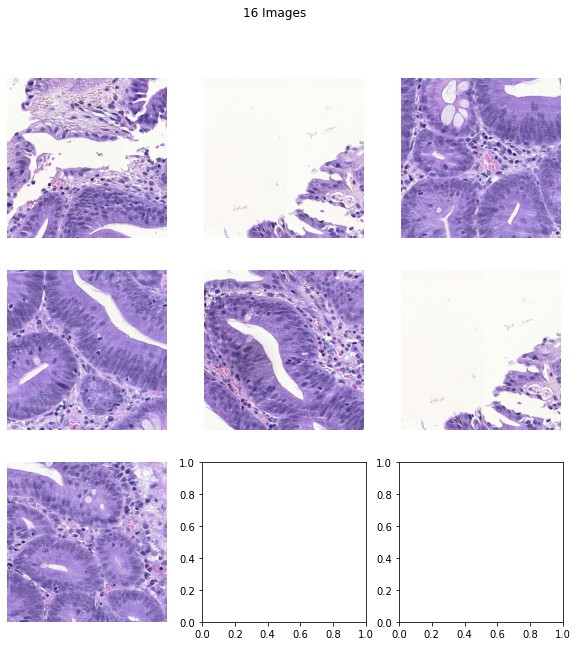

In [272]:
proc2.display_8_neighbours(6,11)

# Image 3

In [277]:
p= './Images/TCGA-AA-A00F-01Z-00-DX1.7E748515-2D18-4061-AF9A-E1446E44E7B8.svs'

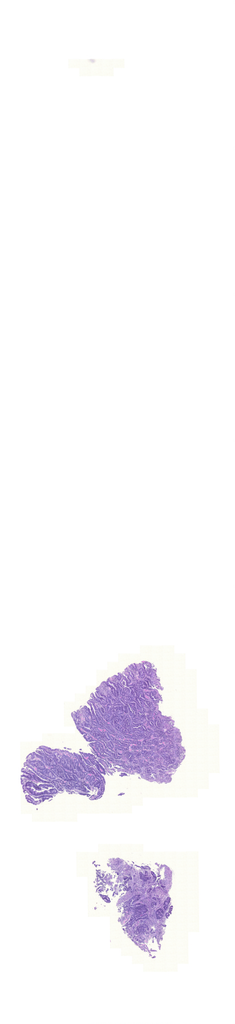

In [278]:
slide = open_slide(p)
slic = slide.get_thumbnail(size=(1024,1024))
slic

In [279]:
path = './img3_patches'
proc3 = WSI_images(1024,slide,path,0.5) #sending size eqaual to 1024 * 1024

In [281]:
proc3.make_patches()

saving images by name:  ./img1_patches/0_0
16
saving images by name:  ./img1_patches/1_0
16
saving images by name:  ./img1_patches/2_0
16
saving images by name:  ./img1_patches/3_0
16
saving images by name:  ./img1_patches/4_0
16
saving images by name:  ./img1_patches/5_0
16
saving images by name:  ./img1_patches/6_0
16
saving images by name:  ./img1_patches/7_0
16
saving images by name:  ./img1_patches/8_0
16
saving images by name:  ./img1_patches/9_0
16
saving images by name:  ./img1_patches/10_0
16
saving images by name:  ./img1_patches/11_0
16
saving images by name:  ./img1_patches/12_0
16
saving images by name:  ./img1_patches/13_0
16
saving images by name:  ./img1_patches/14_0
16
saving images by name:  ./img1_patches/15_0
16
saving images by name:  ./img1_patches/16_0
16
saving images by name:  ./img1_patches/17_0
16
saving images by name:  ./img1_patches/18_0
16
saving images by name:  ./img1_patches/19_0
16
saving images by name:  ./img1_patches/20_0
16
saving images by name: 

KeyboardInterrupt: 

In [282]:
#default dictionary 
proc2.return_index()

defaultdict(None,
            {0: [(0, 0), (1024, 1024)],
             1: [(0, 1), (1024, 1024)],
             2: [(0, 2), (1024, 1024)],
             3: [(0, 3), (1024, 1024)],
             4: [(0, 4), (1024, 1024)],
             5: [(0, 5), (1024, 1024)],
             6: [(0, 6), (1024, 1024)],
             7: [(0, 7), (1024, 1024)],
             8: [(0, 8), (1024, 1024)],
             9: [(0, 9), (1024, 1024)],
             10: [(0, 10), (1024, 1024)],
             11: [(0, 11), (1024, 1024)],
             12: [(0, 12), (1024, 1024)],
             13: [(0, 13), (1024, 1024)],
             14: [(0, 14), (1024, 1024)],
             15: [(0, 15), (1024, 1024)],
             16: [(0, 16), (1024, 1024)],
             17: [(0, 17), (1024, 1024)],
             18: [(0, 18), (1024, 1024)],
             19: [(0, 19), (1024, 1024)],
             20: [(0, 20), (1024, 1024)],
             21: [(0, 21), (1024, 1024)],
             22: [(0, 22), (1024, 1024)],
             23: [(0, 23), (1024, 10

# Image 4:

In [284]:
p = './Images/TCGA-AA-3511-01Z-00-DX1.F66F89C7-147D-4EE9-A482-61C3033EF443.svs'

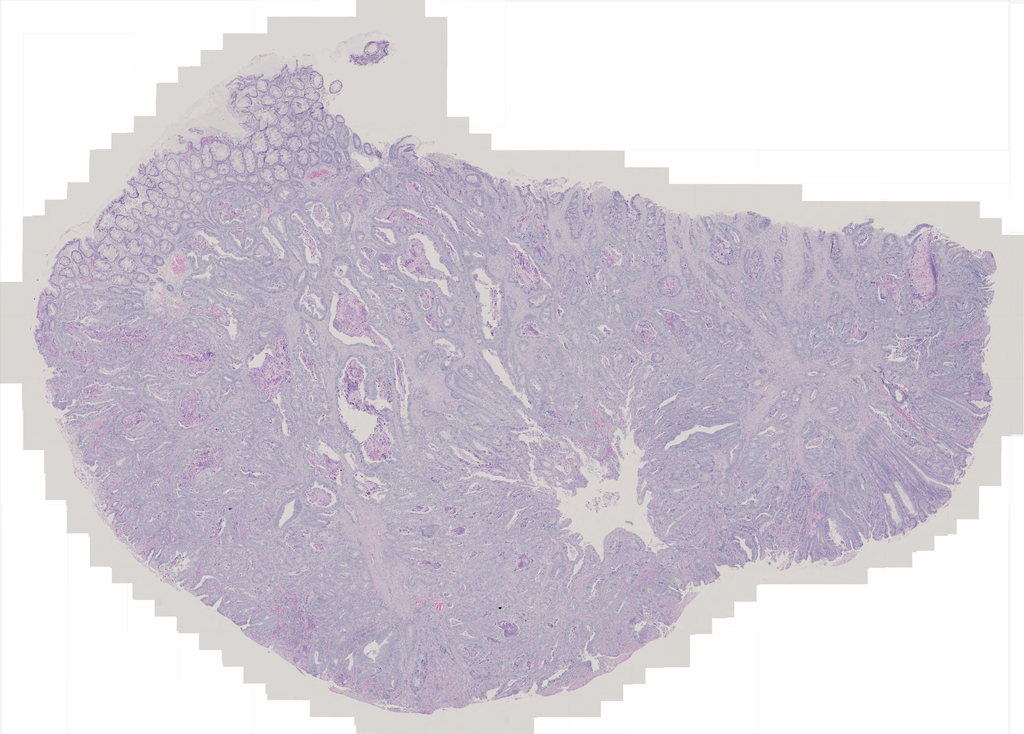

In [285]:
slide = open_slide(p)
slic = slide.get_thumbnail(size=(1024,1024))
slic

In [286]:
path = './img4_patches'
proc4 = WSI_images(1024,slide,path,0.5) #sending size eqaual to 1024 * 1024

In [290]:
#default dictionary 
proc2.return_index()

defaultdict(None,
            {0: [(0, 0), (1024, 1024)],
             1: [(0, 1), (1024, 1024)],
             2: [(0, 2), (1024, 1024)],
             3: [(0, 3), (1024, 1024)],
             4: [(0, 4), (1024, 1024)],
             5: [(0, 5), (1024, 1024)],
             6: [(0, 6), (1024, 1024)],
             7: [(0, 7), (1024, 1024)],
             8: [(0, 8), (1024, 1024)],
             9: [(0, 9), (1024, 1024)],
             10: [(0, 10), (1024, 1024)],
             11: [(0, 11), (1024, 1024)],
             12: [(0, 12), (1024, 1024)],
             13: [(0, 13), (1024, 1024)],
             14: [(0, 14), (1024, 1024)],
             15: [(0, 15), (1024, 1024)],
             16: [(0, 16), (1024, 1024)],
             17: [(0, 17), (1024, 1024)],
             18: [(0, 18), (1024, 1024)],
             19: [(0, 19), (1024, 1024)],
             20: [(0, 20), (1024, 1024)],
             21: [(0, 21), (1024, 1024)],
             22: [(0, 22), (1024, 1024)],
             23: [(0, 23), (1024, 10

#  ------------------------------------------------------------------

# Testing Functions of library openslide

In [2]:
from openslide import open_slide
import openslide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

## image 1

In [253]:
slide1 = open_slide('./Images/TCGA-AA-3814-01Z-00-DX1.15a569dc-30d6-4bef-908b-6183df4e9e01.svs')

In [51]:
DIM=slide1.dimensions
DIM

(30464, 35584)

In [50]:
slide1.level_dimensions

((30464, 35584), (7616, 8896), (1904, 2224))

In [7]:
#spatial resolution 1024 * 1024
slic = slide1.get_thumbnail(size=(1024,1024))

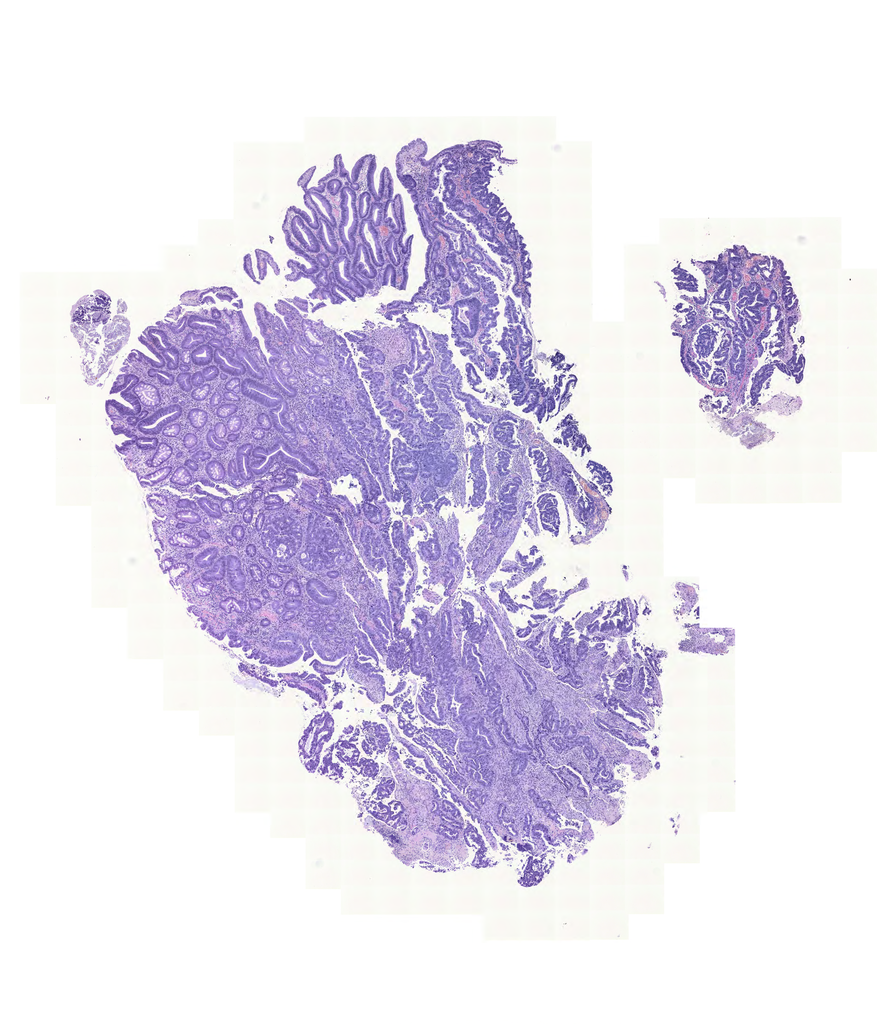

In [8]:
slic

In [89]:
#region
dim = (1024,1024)
x=0
datch=[]
for i in range(0,DIM[0],10000):
    for j in range(0,DIM[1],10000):
        datch.append(slide1.read_region((i,j),2,dim))

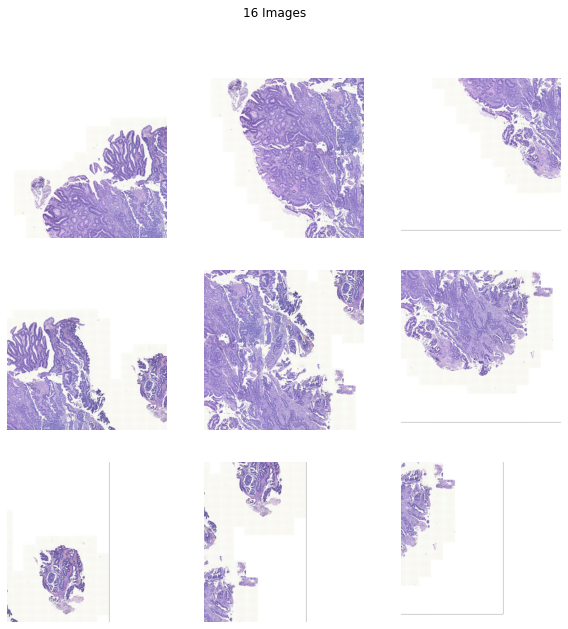

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))


# Loop through each subplot and plot an image
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(datch[i*4+j])
        axs[i, j].axis("off")

# Add a title to the plot
fig.suptitle("16 Images")

# Display the plot
plt.show()


# image 2

In [32]:
slide = open_slide('./Images/TCGA-AA-3492-01Z-00-DX1.32D79909-71D5-4843-847E-AECA5DBC963D.svs')

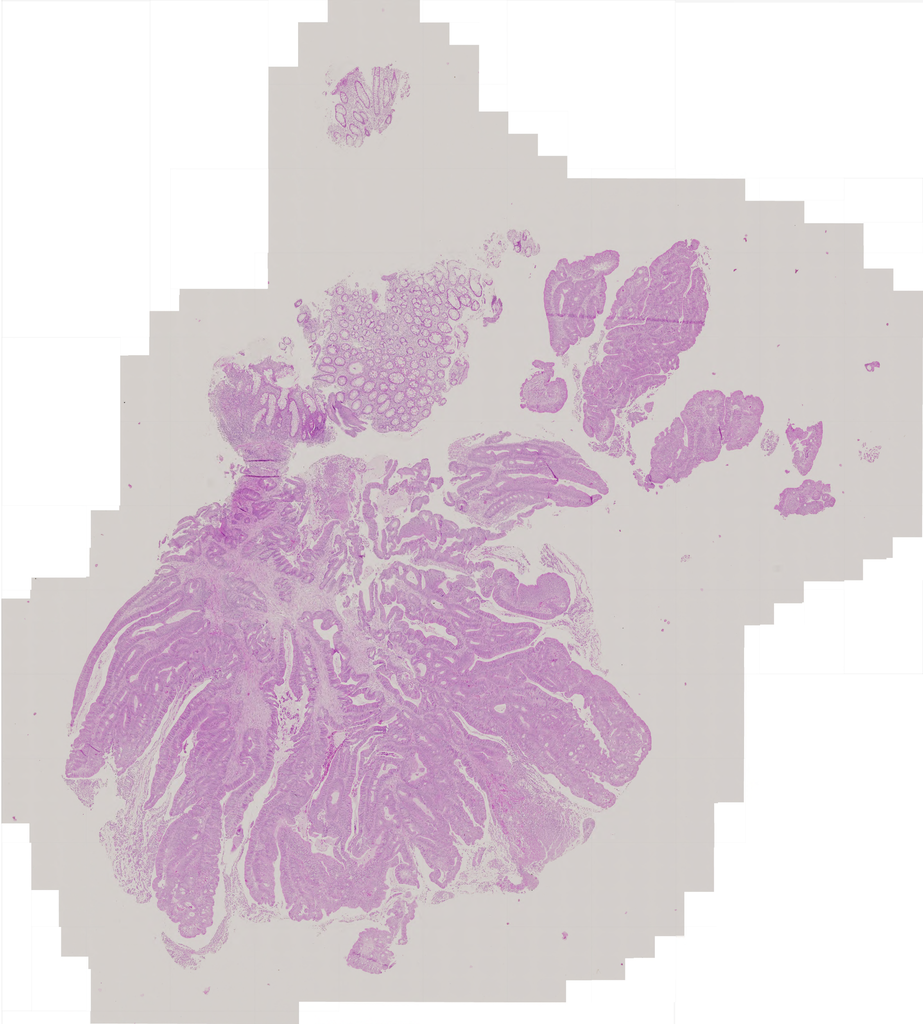

In [33]:
#spatial resolution 1024 * 1024
slic = slide.get_thumbnail(size=(1024,1024))
slic

In [34]:
dim = slide.dimensions

In [35]:
#region
dim = (1024,1024)
x=0
datch=[]
for i,j in zip(range(0,5,1),range(0,5,1)): 
    datch.append(slide.read_region((i,j),2,dim))

In [36]:
#level dimensions
dims = slide.level_dimensions
dims

((9018, 10000), (2254, 2500))

In [37]:
factors = slide.level_downsamples
factors

(1.0, 4.000443655723158)

In [38]:
level3_dim = dims[1]
level3_dim

(2254, 2500)

# Tiles

In [261]:
from openslide.deepzoom import DeepZoomGenerator

tiles = DeepZoomGenerator(slide1,tile_size=1024,overlap=0,limit_bounds=False)

In [262]:
tiles.level_count

17

In [256]:
tile_dims = tiles.get_tile_dimensions(14,(2,2))
tile_dims

(1024, 1024)

In [257]:
tiles_count_in_large_image = tiles.level_tiles[11]
tiles_count_in_large_image

(1, 2)

In [259]:
title_dims = tiles.get_tile_dimensions(16,(0,0))

In [68]:
title_dims

(1024, 1024)

In [124]:
# single_tile = tiles.get_tile(16,(0,1))
# single_tile.show()

In [128]:
cols,rows = tiles.level_tiles[16]

In [129]:
col, rows

(0, 4)

In [ ]:
# import openslide
# import os

# # Open the .svs file using OpenSlide
# slide = openslide.open_slide('example.svs')

# # Define the patch size and stride
# patch_size = 1024
# stride = 512

# # Get the dimensions of the image
# w, h = slide.dimensions

# # Loop through the image and extract patches
# for i in range(0, w-patch_size+1, stride):
#     for j in range(0, h-patch_size+1, stride):
#         # Get the patch from the slide
#         patch = slide.read_region((i, j), 0, (patch_size, patch_size))
        
#         # Save the patch as a JPEG file
#         patch.save(f'patch_{i}_{j}.jpg')

# # Close the slide
# slide.close()


In [264]:
import os 

cols,rows = tiles.level_tiles[14]

tile_dir = "./img1_patches"
for row in range(rows):
    for col in range(cols):
        tile_name = os.path.join(tile_dir,'%d_%d' % (col,row))
        print("saving images by name: ", tile_name)
        temp_tile = tiles.get_tile(14,(col,row))
        temp_tile_np = np.array(temp_tile)
        plt.imsave(tile_name + ".png" , temp_tile_np)

saving images by name:  ./img1_patches/0_0
saving images by name:  ./img1_patches/1_0
saving images by name:  ./img1_patches/2_0
saving images by name:  ./img1_patches/3_0
saving images by name:  ./img1_patches/4_0
saving images by name:  ./img1_patches/5_0
saving images by name:  ./img1_patches/6_0
saving images by name:  ./img1_patches/7_0
saving images by name:  ./img1_patches/0_1
saving images by name:  ./img1_patches/1_1
saving images by name:  ./img1_patches/2_1
saving images by name:  ./img1_patches/3_1
saving images by name:  ./img1_patches/4_1
saving images by name:  ./img1_patches/5_1
saving images by name:  ./img1_patches/6_1
saving images by name:  ./img1_patches/7_1
saving images by name:  ./img1_patches/0_2
saving images by name:  ./img1_patches/1_2
saving images by name:  ./img1_patches/2_2
saving images by name:  ./img1_patches/3_2
saving images by name:  ./img1_patches/4_2
saving images by name:  ./img1_patches/5_2
saving images by name:  ./img1_patches/6_2
saving imag

# Image 2

In [95]:
slide = open_slide('./Images/TCGA-AA-3492-01Z-00-DX1.32D79909-71D5-4843-847E-AECA5DBC963D.svs')

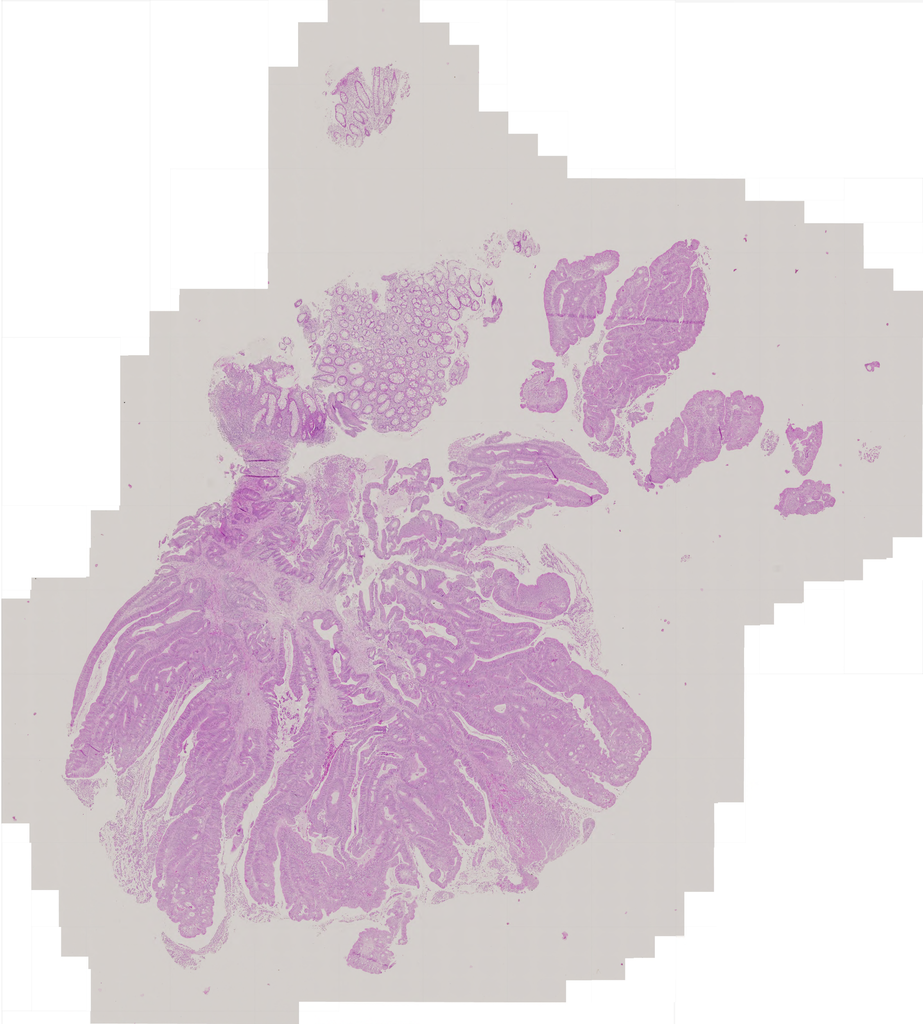

In [96]:
slic = slide.get_thumbnail(size=(1024,1024))
slic

In [ ]:
dim = slide.dimensions

In [130]:
from openslide.deepzoom import DeepZoomGenerator
tiles = DeepZoomGenerator(slide,tile_size=1000,overlap=0,limit_bounds=False)

In [63]:
factor = tiles.level_count-1
factor

14

In [64]:
tiles.level_tiles[factor]

(9, 10)

In [133]:
import os 

cols,rows = tiles.level_tiles[factor]

tile_dir = "./img2_patches"
for row in range(rows):
    for col in range(cols):
        tile_name = os.path.join(tile_dir,'%d_%d' % (col,row))
        print("saving images by name: ", tile_name)
        temp_tile = tiles.get_tile(factor,(col,row))
        temp_tile_np = np.array(temp_tile)
        plt.imsave(tile_name + ".png" , temp_tile_np)

saving images by name:  ./img2_patches/0_0
saving images by name:  ./img2_patches/1_0
saving images by name:  ./img2_patches/2_0
saving images by name:  ./img2_patches/3_0
saving images by name:  ./img2_patches/4_0
saving images by name:  ./img2_patches/5_0
saving images by name:  ./img2_patches/6_0
saving images by name:  ./img2_patches/7_0
saving images by name:  ./img2_patches/8_0
saving images by name:  ./img2_patches/9_0
saving images by name:  ./img2_patches/0_1
saving images by name:  ./img2_patches/1_1
saving images by name:  ./img2_patches/2_1
saving images by name:  ./img2_patches/3_1
saving images by name:  ./img2_patches/4_1
saving images by name:  ./img2_patches/5_1
saving images by name:  ./img2_patches/6_1
saving images by name:  ./img2_patches/7_1
saving images by name:  ./img2_patches/8_1
saving images by name:  ./img2_patches/9_1
saving images by name:  ./img2_patches/0_2
saving images by name:  ./img2_patches/1_2
saving images by name:  ./img2_patches/2_2
saving imag

In [137]:
from matplotlib.pyplot import imshow,imread

im = imread('./img2_patches/0_7.png')

In [140]:
len(im)

1000